In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from drl_grams import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
import os

mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

# Genetic Algorithms

In the directory `genetic_algorithm_results/` the results obtained using genetic algorithms can be found. Different subdirectories represent different combinations of hyperparameters. First, we will study 20 samples obtained using three different fitness functions:

- **reward based**: (reward_based) emulates RL reward from [1], in the sense that it accumulates over time steps rewarding better fidelity and discounting for each extra step with a reward decay gamma to promote faster transmissions
- **natural based**: (loc_based) also accumulates over time steps but rewards a transmission that behaves in a similar way to the natural evolution. The *wave* propagates at a similar speed but tries to achieve a higher max probability.
- **ipr based**: (ipr_based) rewards a localized transition, in the sense that it attempts to have a concentrated package

We also study two action sets:
- **Zhang actions**: Set of actions used in the original work of Zhang et al [1]
- **One Action Per Site**: Set of actions consisting of the N actions corresponding to a control site on each qubit plus the *zero* action which means not controlling any site.

Different subdirectories represent different combinations of hyperparameters. For example, the following 4 subdirectories include results correspoding to the two first described fitness functions for both action sets. 

In [17]:
rb_zhang = 'genetic_algorithm_results/rb_zhang/'   # Reward-based fitness function and Zhang et al actions
rb_oaps = 'genetic_algorithm_results/rb_oaps/'     # Reward-based fitness function and one action per site
nb_zhang = 'genetic_algorithm_results/nb_zhang/'   # Natural-based fitness function and Zhang et al actions
nb_oaps = 'genetic_algorithm_results/nb_oaps/'     # Natural-based fitness function and one action per site
ipr_oaps = 'genetic_algorithm_results/ipr_oaps/'     # IPR-based fitness function and one action per site
ipr_zhang = 'genetic_algorithm_results/ipr_zhang/'   # IPR-based fitness function and Zhang et al actions
directories = [rb_zhang, rb_oaps, nb_zhang, nb_oaps, ipr_oaps, ipr_zhang]


A summary of all the hyper-parameters and system parameters used to obtain each directory can be accesed by calling the `access_ga_params` function. For example, the output of the following cell shows the parameters corresponding to the directory `rb_zhang`, where we employ reward-based fitness and Zhang et al actions, which can be verified in the printed dataframe. 

In [18]:
rb_zhang_parameters = access_ga_params(rb_zhang,print_params=True)

Showing parameters for genetic_algorithm_results/rb_zhang/:
╒═══════════════════╤═══════════════════════╤══════════════╕
│ Section           │ Parameter             │ Value        │
╞═══════════════════╪═══════════════════════╪══════════════╡
│ system_parameters │ initial_n             │ 8            │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ final_n               │ 64           │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ n_step                │ 4            │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ dt                    │ 0.15         │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ b                     │ 100          │
├───────────────────┼───────────────────────┼──────────────┤
│ system_parameters │ speed_fraction        │ 1.1          │
├───────────────────┼───────────────────────┼──────────────┤
│ ga_initialization │ num

We can also access a particular parameter value using `get_parameter_value`

In [19]:
for directory in directories:
    print('--------------------------------------------------')
    print('Directory: ', directory)
    print('--------------------------------------------------')
    ga_params = access_ga_params(directory,print_params=False)
    used_fitness = get_parameter_value(ga_params,'fitness_function',print_value=True)
    used_actions = get_parameter_value(ga_params,'action_set',print_value=True)


--------------------------------------------------
Directory:  genetic_algorithm_results/rb_zhang/
--------------------------------------------------
Parameter 'fitness_function' :  reward_based
Parameter 'action_set' :  zhang
--------------------------------------------------
Directory:  genetic_algorithm_results/rb_oaps/
--------------------------------------------------
Parameter 'fitness_function' :  reward_based
Parameter 'action_set' :  oaps
--------------------------------------------------
Directory:  genetic_algorithm_results/nb_zhang/
--------------------------------------------------
Parameter 'fitness_function' :  nat_based
Parameter 'action_set' :  zhang
--------------------------------------------------
Directory:  genetic_algorithm_results/nb_oaps/
--------------------------------------------------
Parameter 'fitness_function' :  nat_based
Parameter 'action_set' :  oaps
--------------------------------------------------
Directory:  genetic_algorithm_results/ipr_oaps/
---

And access different parameters across a set of directories

In [20]:
get_different_parameters(directories,print_params=True)


Parameters with Different Values:
╒═════════════╤═══════════════════════════════════════╤════════════════════════════════════════╤══════════════════════════════════════╤═══════════════════════════════════════╤══════════════════════════════════════╤═══════════════════════════════════════╕
│ Parameter   │ genetic_algorithm_results/ipr_oaps/   │ genetic_algorithm_results/ipr_zhang/   │ genetic_algorithm_results/nb_oaps/   │ genetic_algorithm_results/nb_zhang/   │ genetic_algorithm_results/rb_oaps/   │ genetic_algorithm_results/rb_zhang/   │
╞═════════════╪═══════════════════════════════════════╪════════════════════════════════════════╪══════════════════════════════════════╪═══════════════════════════════════════╪══════════════════════════════════════╪═══════════════════════════════════════╡
│ actions     │ oaps                                  │ zhang                                  │ oaps                                 │ zhang                                 │ oaps                    

directory,genetic_algorithm_results/ipr_oaps/,genetic_algorithm_results/ipr_zhang/,genetic_algorithm_results/nb_oaps/,genetic_algorithm_results/nb_zhang/,genetic_algorithm_results/rb_oaps/,genetic_algorithm_results/rb_zhang/
Parameter,,,,,,
actions,oaps,zhang,oaps,zhang,oaps,zhang
directory,ipr_oaps,ipr_zhang,nb_oaps,nb_zhang,rb_oaps,rb_zhang
fitness,ipr_based,ipr_based,nat_based,nat_based,reward_based,reward_based


We can analyze the obtained results for different combinations of fitness functions and rewards. The results file contains the following metrics: 

- `max_fidelity`: max. transmission probability
- `ttime`: time step for which the maximum transmission probability is achieved
- `cpu_time`: cpu time spent for that sample
- `generations` : number of genetic algorithm generations


The `plot_metric` function shows the mean and max value of the different metrics across the 20 samples (or, in general, all the samples in the provided directory). It takes as arguments the directories to analyze and the corresponding metric. 

### Mean and max fidelity

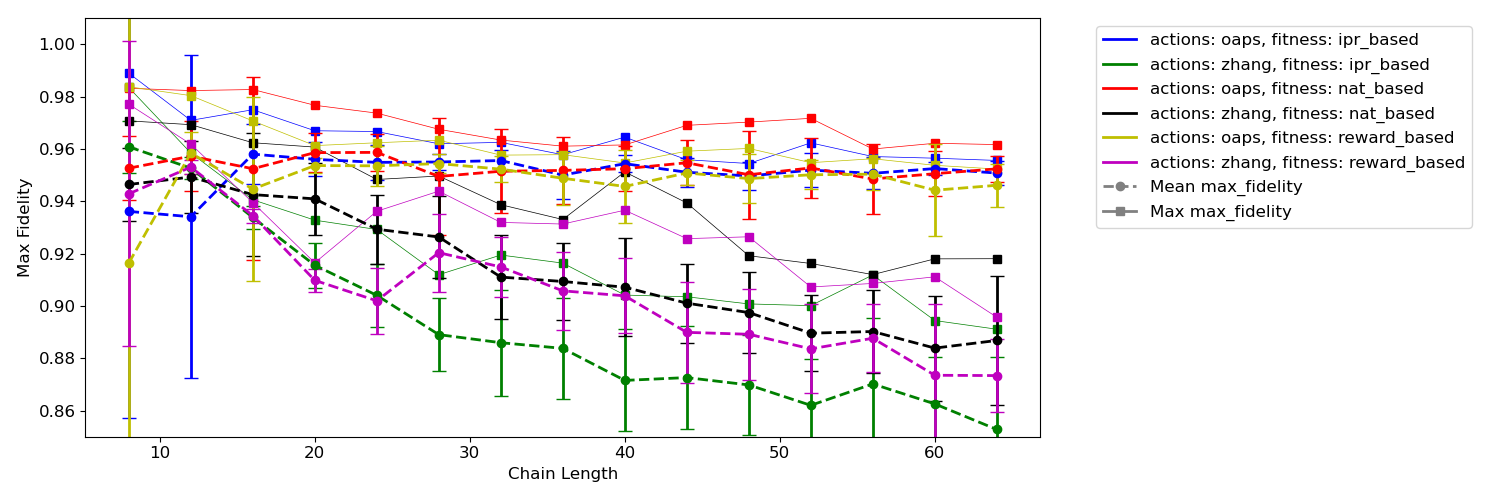

In [21]:
plt.figure(figsize=(15, 5))
plot_metric(directories,'max_fidelity')
plt.ylabel('Max Fidelity')
plt.xlabel('Chain Length')
plt.ylim(0.85,1.01)
plt.tight_layout()

As one would expect, the first set of actions performs poorly for longer chains since it has less control sites. We are currently studying the minimum number of control sites required to achieve an acceptable transmission. Fitness function does not have such a strong effect on the achieved transmission probability but in the following section we will see that it does affect the behaviour of the transmission.

### CPU time

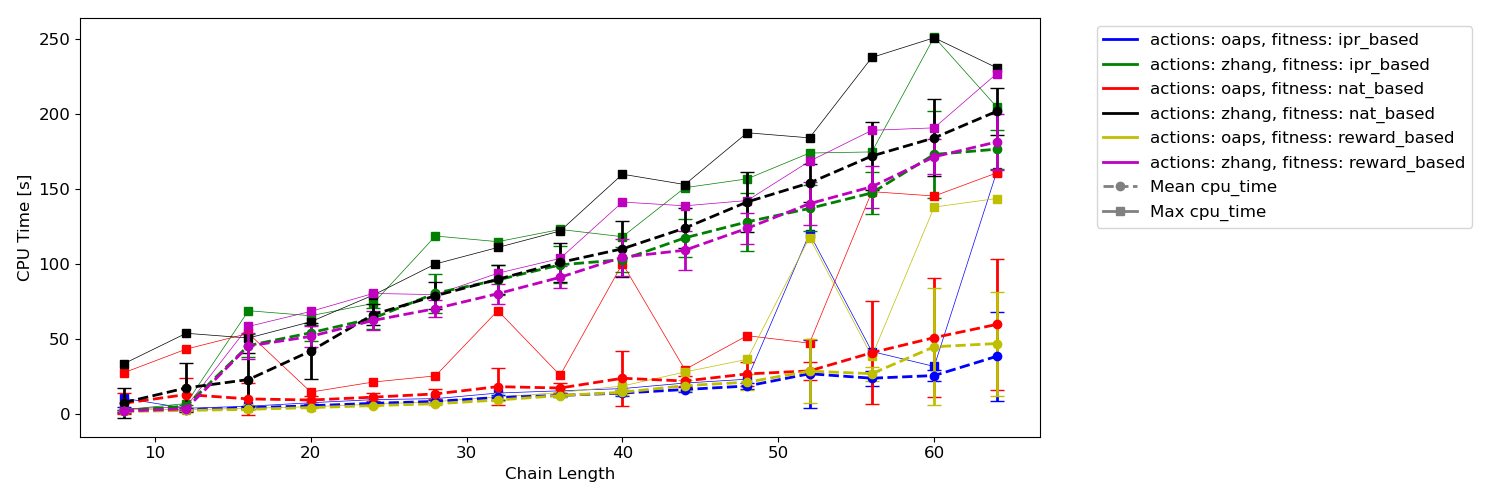

In [22]:
plt.figure(figsize=(15, 5))
plot_metric(directories,'cpu_time')
plt.xlabel('Chain Length')
plt.ylabel('CPU Time [s]')
plt.tight_layout()

Even for long chains, the algorithm is really efficient. The longer times in worse performance scenarios have to do with the fact that if the algorithm does not converge it takes a longer total time since it performs more generations trying to find a better solution.

# Effect in the solution of different fitness functions

To study the effect of different fitness functions we can also study the behaviour of the transition probability over time. `plot_ga_solutions` will plot all solutions for a definite chain length in the provided directories. For example, the following graph shows all the solutions found for chains of length 16, using one action per site and the three different fitness functions.

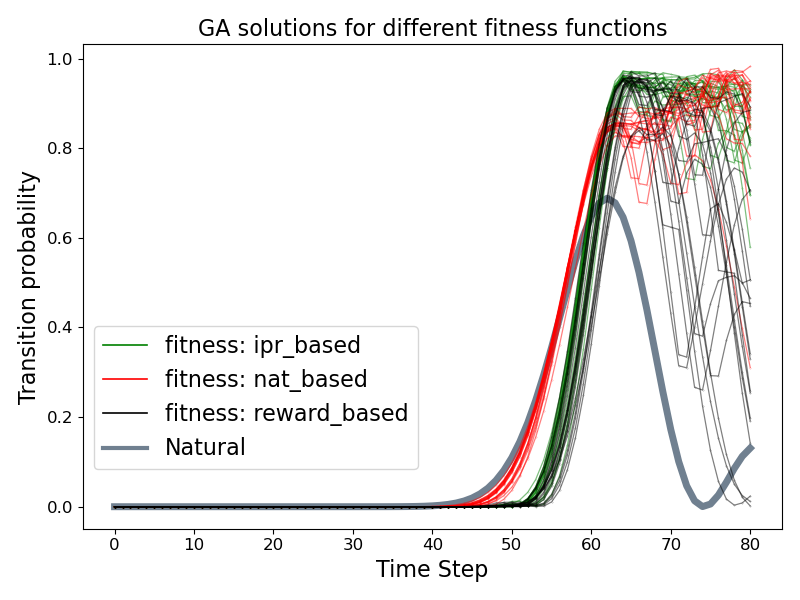

In [23]:
plt.figure(figsize=(8, 6))
plt.title('GA solutions for different fitness functions', fontsize=16)
n=16
plot_ga_solutions([nb_oaps,rb_oaps, ipr_oaps],n,add_natural=True,fs=16)


We can also plot only the max_fid solutions using `plot_max_fid_solutions`. The following graph shows clearly how using a fitness that rewards a behaviour similar to the natural evolution the found sequence adopts the shape of the natural evolution of the transition probability. However, the scenario where we have a high transition probability over more time steps might be preferable.

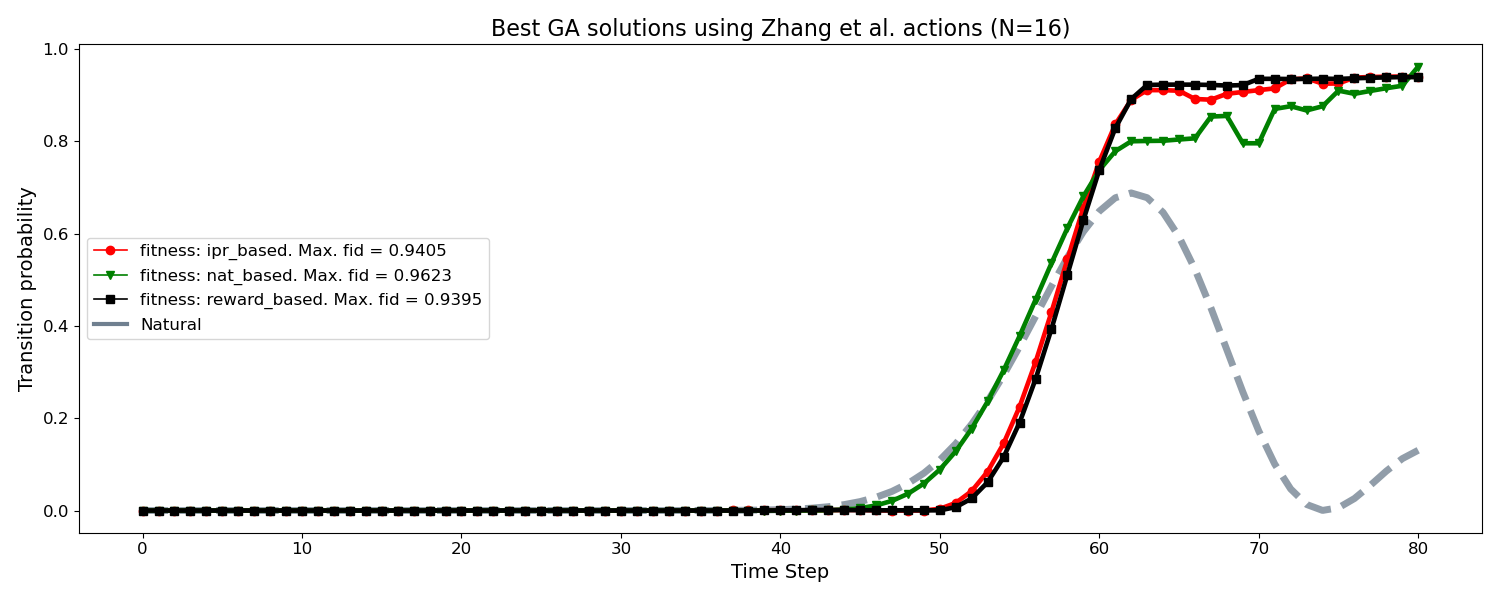

In [24]:
plt.figure(figsize=(15, 6))
plt.title('Best GA solutions using Zhang et al. actions (N=16)', fontsize=16)
plot_max_fid_solutions([nb_zhang,rb_zhang,ipr_zhang],16,add_natural=True,fs=14,nsamples=1)

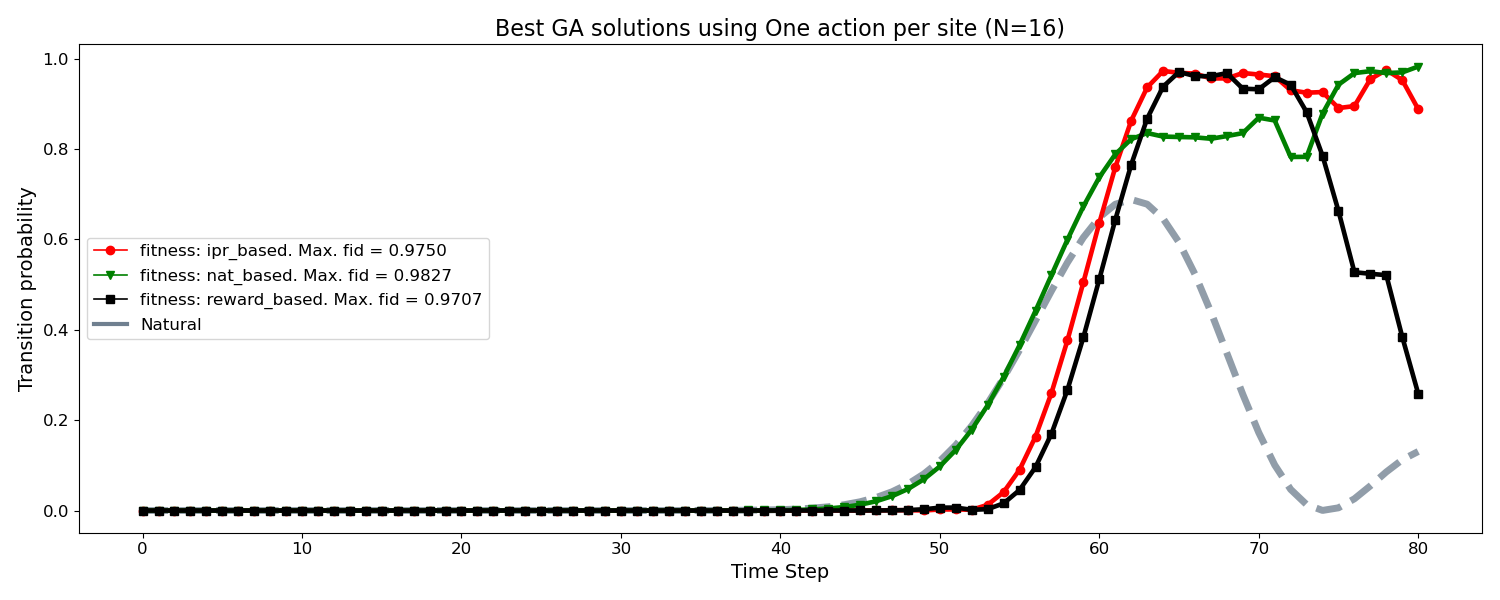

In [25]:
plt.figure(figsize=(15, 6))
plt.title('Best GA solutions using One action per site (N=16)', fontsize=16)
plot_max_fid_solutions([nb_oaps, rb_oaps, ipr_oaps] ,16,add_natural=True,fs=14,nsamples=1)

The results improve when using one action per site which makes sense since more control sites are being employed, allowing greater fidelities.

We can test the limits of our method by imposing a lower tolerance. For example, taking tol = 0.01 or even lower. The following graph includes the results


directory,genetic_algorithm_results/rb_oaps_ht,genetic_algorithm_results/rb_zhang_ht/
Parameter,,
actions,oaps,zhang
directory,rb_oaps_ht,rb_zhang_ht


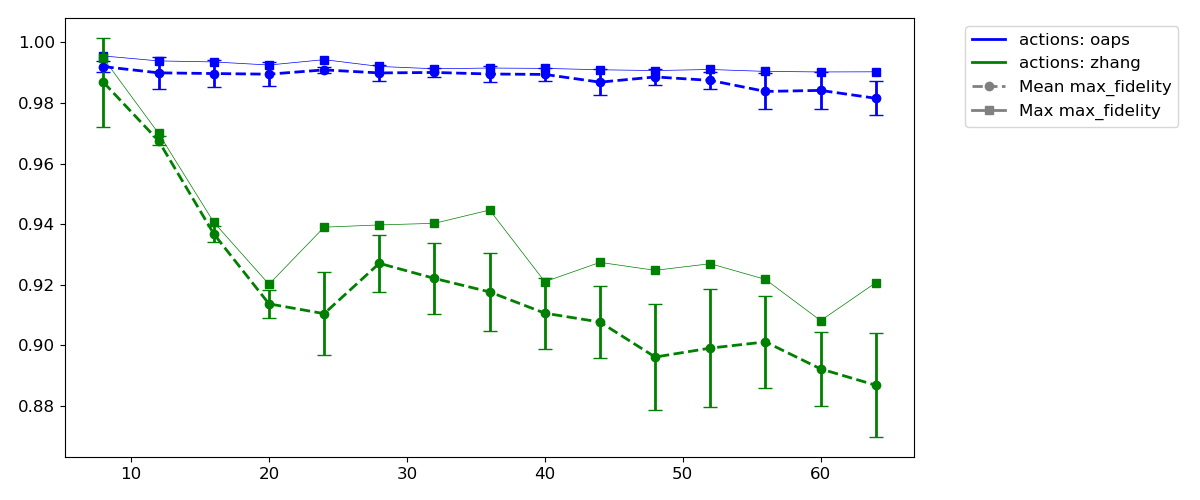

In [26]:
rb_zhang_ht = 'genetic_algorithm_results/rb_zhang_ht/'
rb_oaps_ht = 'genetic_algorithm_results/rb_oaps_ht'
plt.figure(figsize=(12,5))
plot_metric([rb_zhang_ht,rb_oaps_ht],column='max_fidelity')
plt.tight_layout()
directories = [rb_zhang_ht,rb_oaps_ht]
get_different_parameters(directories,print_params=False)

We can also inspect the behaviour of our high tolerance solutions. Here we show the evolution of transmission fidelity for chain lengths of: 16,24 and 40 spins

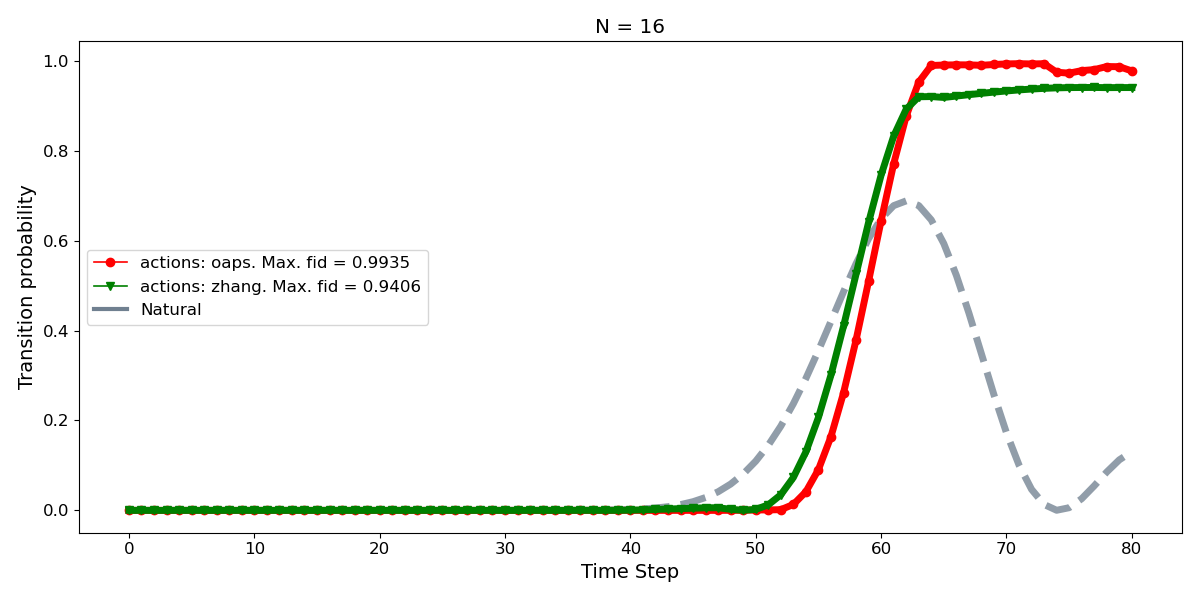

In [27]:
plt.figure(figsize=(12,6))
plt.title('N = 16')
plot_max_fid_solutions([rb_zhang_ht,rb_oaps_ht],16,add_natural=True,fs=14,nsamples=1)
plt.tight_layout()
plt.show()

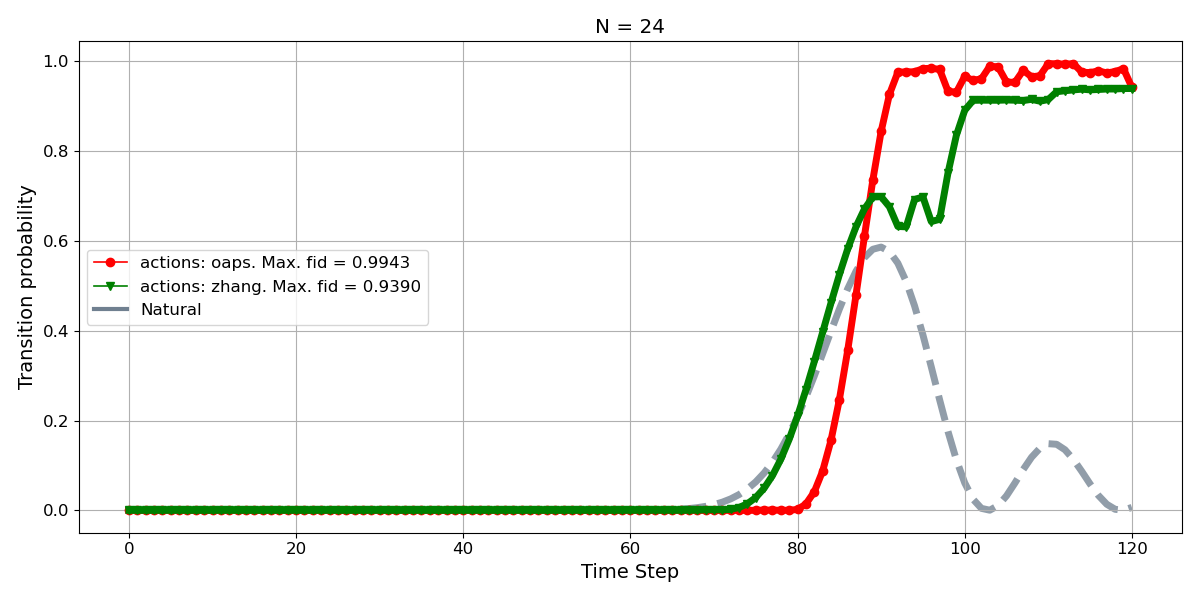

In [28]:
plt.figure(figsize=(12,6))
plt.title('N = 24')
plot_max_fid_solutions([rb_zhang_ht,rb_oaps_ht],24,add_natural=True,fs=14,nsamples=1)
plt.tight_layout()
plt.grid()
plt.show()

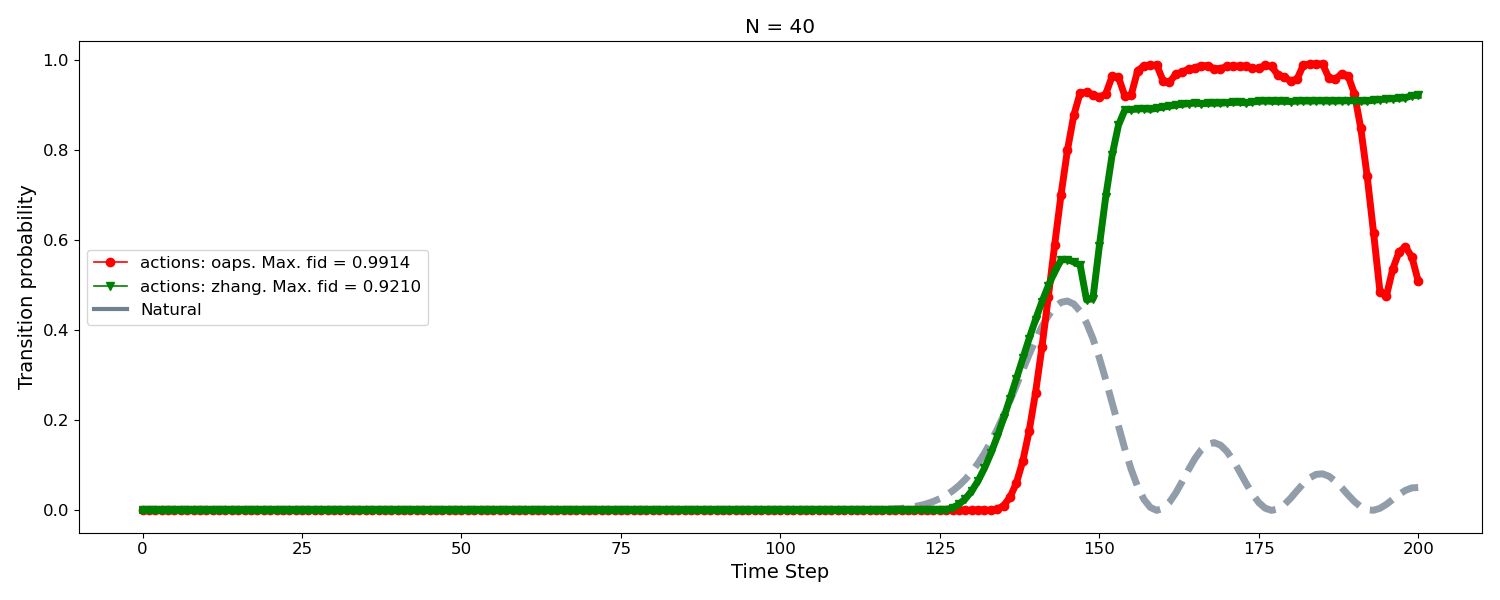

In [29]:
plt.figure(figsize=(15,6))
plt.title('N = 40')
plot_max_fid_solutions([rb_zhang_ht,rb_oaps_ht],40,add_natural=True,fs=14,nsamples=1)
plt.tight_layout()
plt.show()

These results further confirm the efficiency of genetic algorithms and how a larger number of control sites allow greater fidelities.

# Optimization of physical parameters

Using optuna library, which is designed for hyper-parameter optimization, we study the effect on fidelity of varying the magnetic pulse strength and duration. We plot the max fidelity obtained for 100 different combinations of field strength (b) and pulse duration (dt). These results are stored in the ```optuna_results``` directory.

In [30]:
optuna_test = 'optuna_results/n16_max_fid_optuna'
results_df_16 = extract_ga_optuna(optuna_test, scatter_plot=True)
plt.title('Optuna results for N=16')


FileNotFoundError: [Errno 2] No such file or directory: 'optuna_results/n16_max_fid_optuna'

Text(0.5, 1.0, 'Optuna results for N=24')

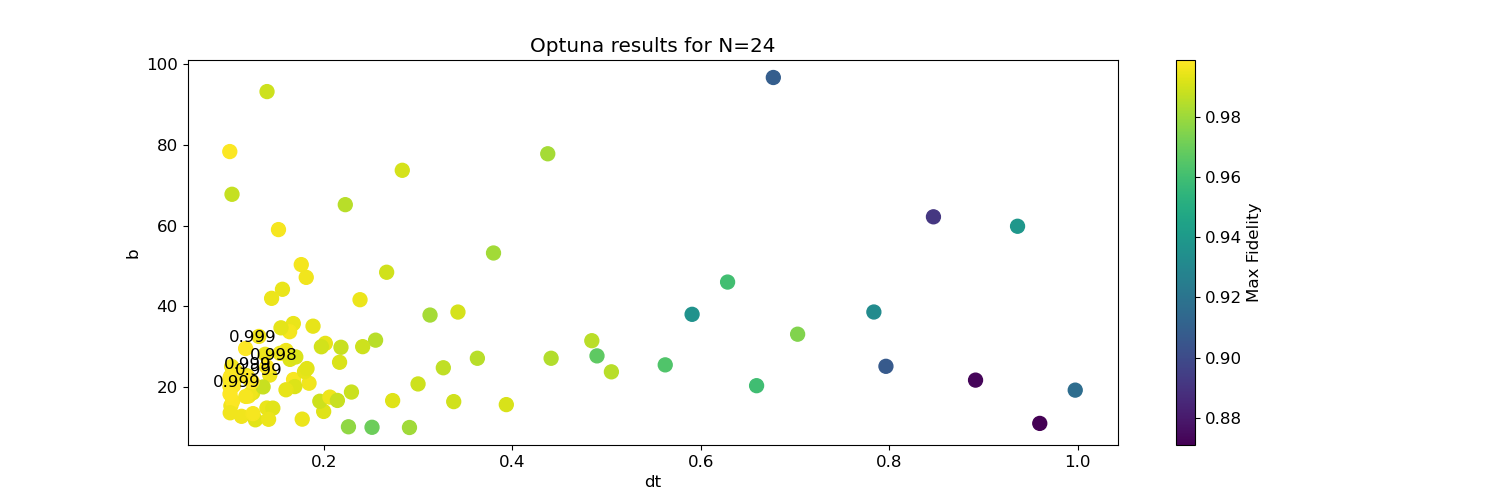

In [ ]:
optuna_test = 'optuna_results/n24_max_fid_optuna'
results_df_24 = extract_ga_optuna(optuna_test, scatter_plot=True)
plt.title('Optuna results for N=24')

Text(0.5, 1.0, 'Optuna results for N=32')

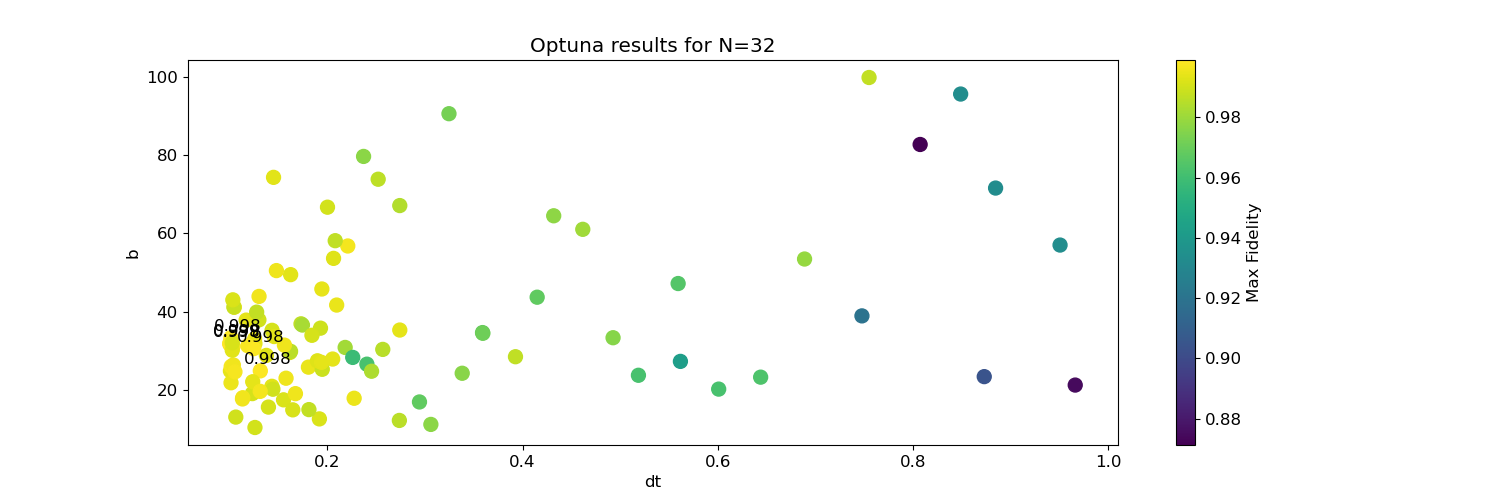

In [ ]:
optuna_test = 'optuna_results/n32_max_fid_optuna'
results_df_32 = extract_ga_optuna(optuna_test, scatter_plot=True)
plt.title('Optuna results for N=32')

The function returns a dataframe in which the trials that produced the best results can be observed.

In [ ]:
results_df_32.head()

,Mean Fidelity,Max Fidelity,Mean Time,dt,b,directory,pruned
0,0.997188,0.999053,22.820584,0.100178,31.933164,trial_57,False
1,0.995951,0.998462,21.890702,0.131397,24.813137,trial_72,False
2,0.996954,0.998358,22.971639,0.101241,33.316625,trial_56,False
3,0.996073,0.998237,22.645779,0.124701,30.514578,trial_63,False
4,0.996930,0.998189,22.795093,0.100110,31.655586,trial_64,False


We can reverse the order and also look at the worst results.

In [ ]:
results_df_32.sort_values(by='Max Fidelity', ascending=True).head(5)

,Mean Fidelity,Max Fidelity,Mean Time,dt,b,directory,pruned
99,0.871210,0.871210,22.602030,0.807215,82.770974,trial_6,True
98,0.874642,0.874642,23.185381,0.966058,21.179007,trial_5,True
97,0.904199,0.904199,23.567456,0.872869,23.340769,trial_99,True
96,0.919821,0.919821,23.175699,0.747603,38.891009,trial_48,True
95,0.908161,0.932884,22.996784,0.884492,71.613605,trial_4,False


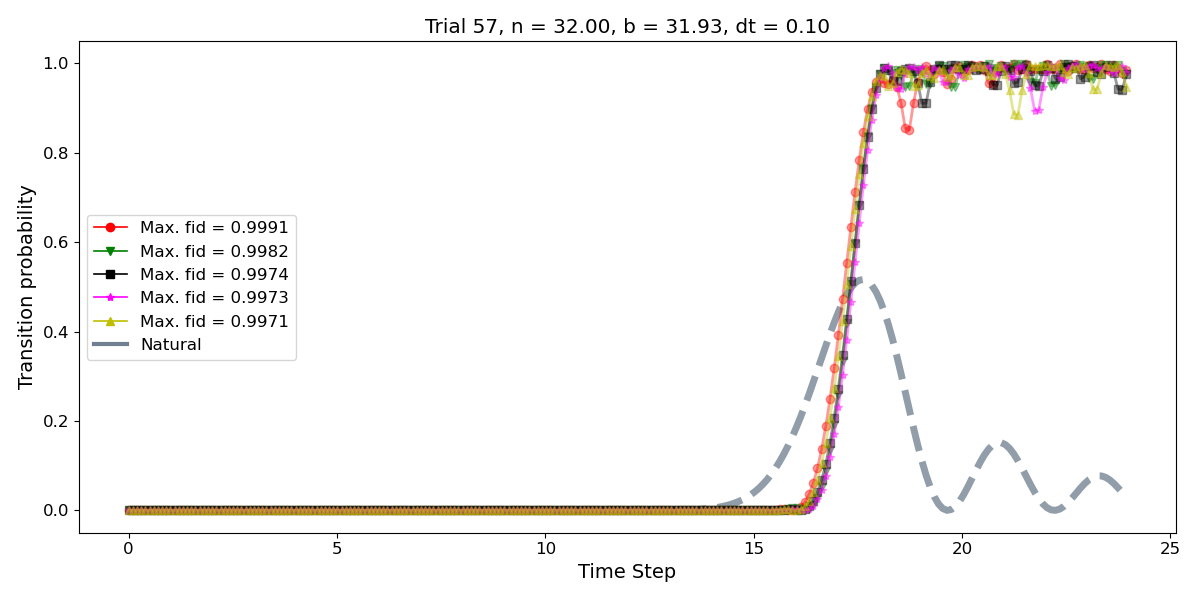

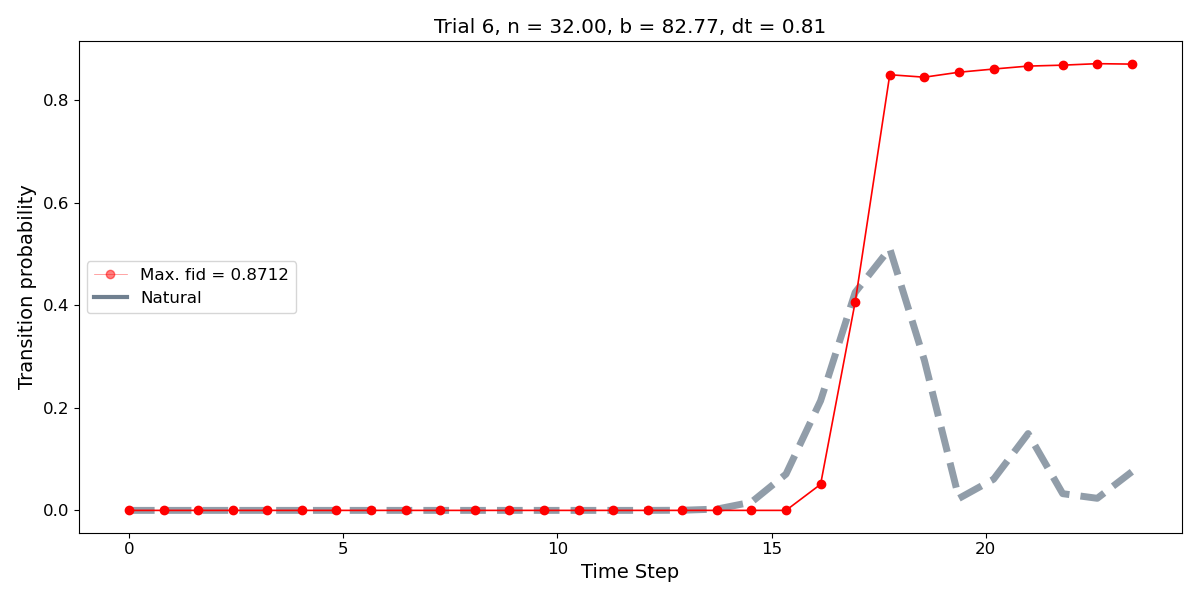

In [ ]:
optuna_test = 'optuna_results/n32_max_fid_optuna'
plot_optuna_ga_trials(optuna_test,32, trials= [57,6],add_natural=True, fs=14, nsamples=5)